# Walmart Sales Analysis (2010-2012)

We chose a dataset on 45 different US Walmart locations. Since the dataset includes datapoints on weekly fuel price, Consumer Price Index, and the unemployment rate in each Walmart's location, we determined it would make sense to analyze weekly sales as a whole + compared between stores (With special attention to the stores that performed the best and worst compared to the total average), and further search for correlations between sales and the aforementioned factors.

First, our imports, both libraries, and the data itself:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
walmart_df = pd.read_csv("Walmart.csv")
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')
walmart_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


# **TO DO**

COMPARISONS:
- Sales + CPI: any correlations; 
- Sales + Fuel Price: any correlations
- Sales + Unemployment Rate: any correlations

EXTRA:
- explain outliers in data with columns not mentioned ex. holiday, maybe temperature, etc

To start with, let's look at the sales data as a whole (note: it's worth noting that sales are expressed in millions, with 0.5 being half a million, etc; fix later?):

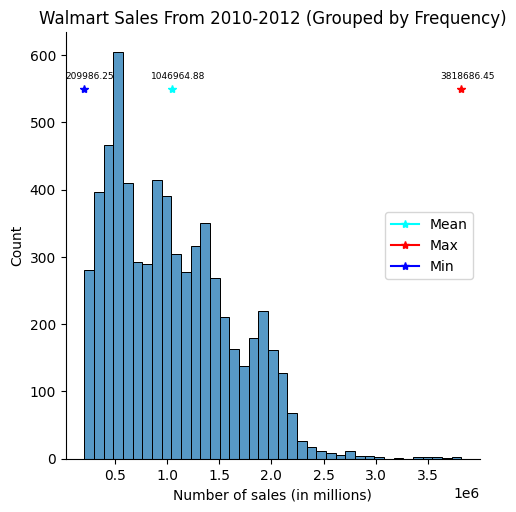

In [3]:
sns.displot(walmart_df, x="Weekly_Sales")

totalmean = round(walmart_df["Weekly_Sales"].mean(), 2)
totalmax = round(walmart_df["Weekly_Sales"].max(), 2)
totalmin = round(walmart_df["Weekly_Sales"].min(), 2)

plt.plot(totalmean, 550, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 200000, 565, totalmean , fontdict={ 'size': 6.5})
plt.plot(totalmax, 550, marker = "*", label = "Max", color = "red")
plt.text(totalmax - 200000, 565, totalmax, fontdict={ 'size': 6.5})
plt.plot(totalmin, 550, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 185000, 565, totalmin, fontdict={ 'size': 6.5})

plt.legend(loc='right')
plt.title("Walmart Sales From 2010-2012 (Grouped by Frequency)")
plt.xlabel("Number of sales (in millions)")

plt.show()

First, we compared each store's weekly sales to determine best and worst-performing:

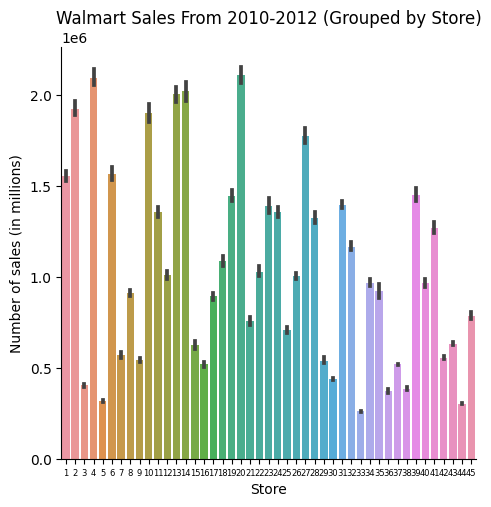

In [4]:
sns.catplot(data=walmart_df, x = "Store", y="Weekly_Sales", kind="bar",)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.ylabel("Number of sales (in millions)")
plt.title("Walmart Sales From 2010-2012 (Grouped by Store)")
plt.show()

It can be hard to clearly see which store had the highest sales (in the case of store 20 vs. store 4) and lowest sales (in the case of store 5 vs. 33), so we took these candidates and compared them closer:

First, we split up the main dataframe by stores:

In [5]:
for x in range(1, 46):
    exec(f'Store{x}_df = walmart_df[walmart_df["Store"] == {x}]')

Now, we can look closer: The two highest (With value labels since it's still hard to see a winner)...

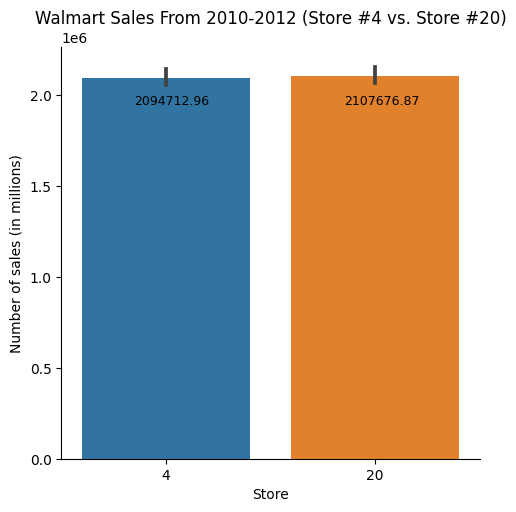

In [6]:
highestcompare = pd.concat([Store20_df, Store4_df])
sns.catplot(data=highestcompare, x = "Store", y="Weekly_Sales", kind="bar",)
plt.text(-0.15, 1950000, round(Store4_df["Weekly_Sales"].mean(), 2) , fontdict={ 'size': 9})
plt.text(.85, 1950000, round(Store20_df["Weekly_Sales"].mean(), 2) , fontdict={ 'size': 9})
plt.ylabel("Number of sales (in millions)")
plt.title("Walmart Sales From 2010-2012 (Store #4 vs. Store #20)")

plt.show()

...And the two lowest (Omitted value labels since it's far easier to see a winner):

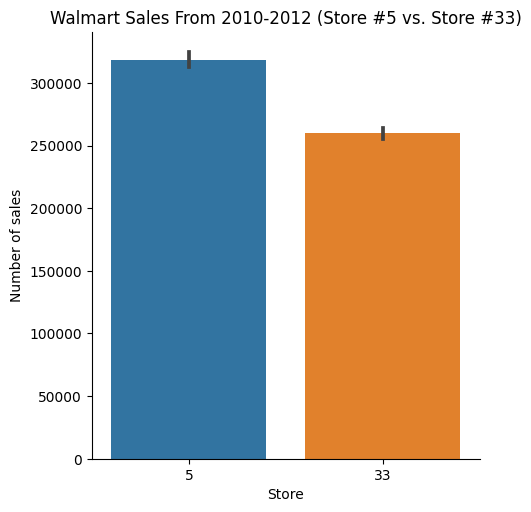

In [7]:
lowestcompare = pd.concat([Store5_df, Store33_df])
sns.catplot(data=lowestcompare, x = "Store", y="Weekly_Sales", kind="bar",)
plt.ylabel("Number of sales")
plt.title("Walmart Sales From 2010-2012 (Store #5 vs. Store #33)")

plt.show()

From this, we determined that the best and worst performing stores were stores 20 and 33, respectively.


Now, we can look at their average sales across the two year period:

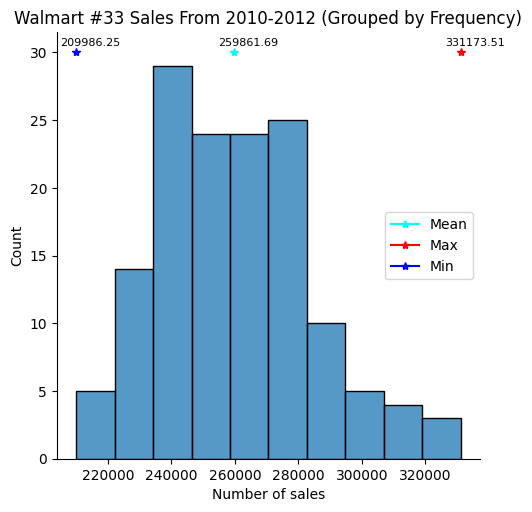

In [8]:
sns.displot(Store33_df, x="Weekly_Sales")

totalmean = round(Store33_df["Weekly_Sales"].mean(), 2)
totalmax = round(Store33_df["Weekly_Sales"].max(), 2)
totalmin = round(Store33_df["Weekly_Sales"].min(), 2)

plt.plot(totalmean, 30, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 5000, 30.5, totalmean , fontdict={ 'size': 8})
plt.plot(totalmax, 30, marker = "*", label = "Max", color = "red")
plt.text(totalmax - 5000, 30.5, totalmax, fontdict={ 'size': 8})
plt.plot(totalmin, 30, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 5000, 30.5, totalmin, fontdict={ 'size': 8})

plt.legend(loc='right')
plt.title("Walmart #33 Sales From 2010-2012 (Grouped by Frequency)")
plt.xlabel("Number of sales")

plt.show()

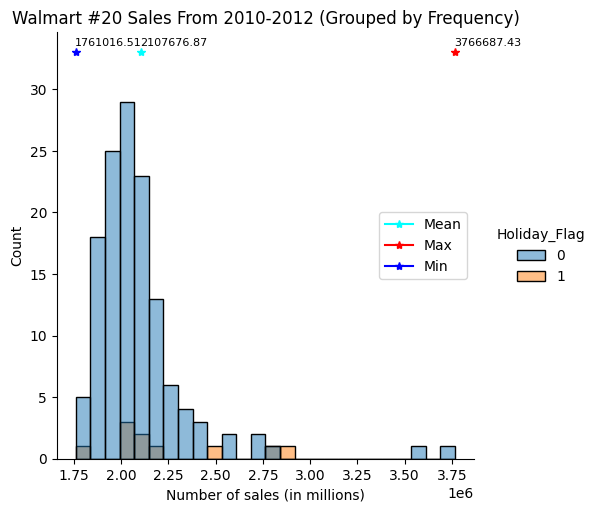

In [9]:
sns.displot(Store20_df, x="Weekly_Sales", hue="Holiday_Flag")

totalmean = round(Store20_df["Weekly_Sales"].mean(), 2)
totalmax = round(Store20_df["Weekly_Sales"].max(), 2)
totalmin = round(Store20_df["Weekly_Sales"].min(), 2)

plt.plot(totalmean, 33, marker = "*", label = "Mean", color = "cyan")
plt.text(totalmean - 5000, 33.5, totalmean , fontdict={ 'size': 8})
plt.plot(totalmax, 33, marker = "*", label = "Max", color = "red")
plt.text(totalmax - 5000, 33.5, totalmax, fontdict={ 'size': 8})
plt.plot(totalmin, 33, marker = "*", label = "Min", color = "blue")
plt.text(totalmin - 5000, 33.5, totalmin, fontdict={ 'size': 8})

plt.legend(loc='right')
plt.title("Walmart #20 Sales From 2010-2012 (Grouped by Frequency)")
plt.xlabel("Number of sales (in millions)")

plt.show()

The sales from store 33 seems to be a lot more consistent than the sales from store 22! Further, we looked at which weeks contained holidays for store 20 to account for the weeks where sales broke 3.5 million and found that holidays were not present on those weeks (But we did find that the temperature for the week of the 3.7 million average weekly sale was in the 20s)

It's worth noting that according to the upload for our data source, 4 holidays were accounted for: Superbowl Week, Thanksgiving, Christmas, and Labor Day.

Finally, to compare the stats of these to stores to the total average: The max across all Walmarts didn't come from store 20, surprisingly, but the min across all Walmarts did come from store 33. The total average sat around 1 million, with 20's average doubling that and 33's average sitting at around 250,000, making it closer to the total average.

Now let's look at the Unemployment, starting with a graph of the unemployment % occurence:

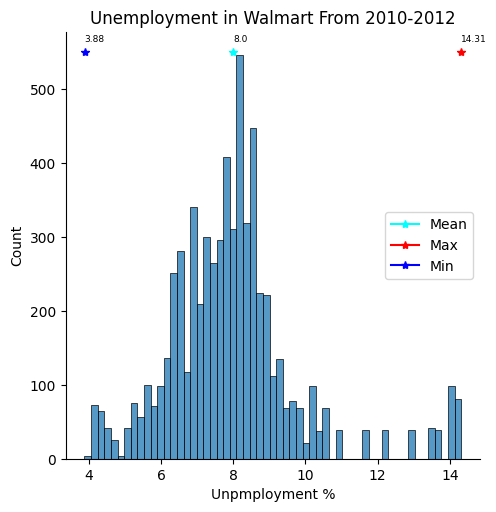

In [22]:
#Unemployment up CPI down
sns.displot(walmart_df, x="Unemployment")

mean = round(walmart_df["Unemployment"].mean(),2)
max = round(walmart_df["Unemployment"].max(),2)
min = round(walmart_df["Unemployment"].min(),2)

plt.plot(mean, 550, marker="*", label="Mean", color = "cyan")
plt.text(mean, 565, mean, fontdict={'size': 6.5})
plt.plot(max, 550, marker="*", label="Max", color = "red")
plt.text(max, 565, max, fontdict={'size': 6.5})
plt.plot(min, 550, marker="*", label="Min", color = "blue")
plt.text(min, 565, min, fontdict={'size': 6.5})
plt.legend(loc='right')

# print(f"max={max},min={min},mean={mean}")
plt.title("Unemployment in Walmart From 2010-2012")
plt.xlabel("Unpmployment %")

plt.show()

Now we find the stores with the most unemployment:

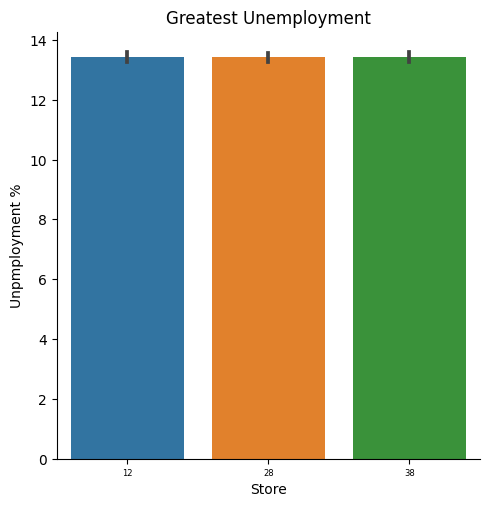

In [52]:
greatest = walmart_df[walmart_df["Unemployment"] > 11]

sns.catplot(greatest, x = "Store", y="Unemployment", kind="bar",)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.ylabel("Unpmployment %")
plt.title("Greatest Unemployment")
plt.show()

Here we can see that stores 12, 28, and 38 have the highest unemployment...

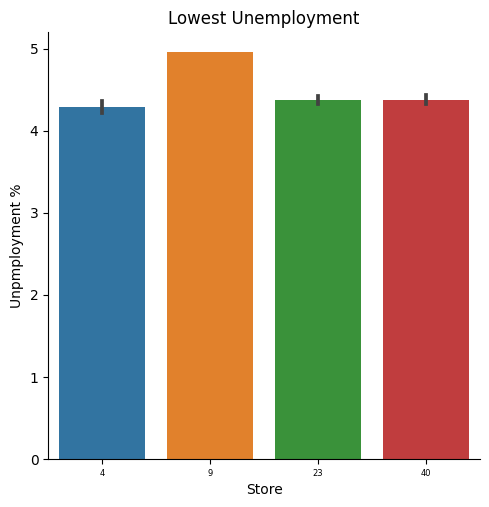

In [38]:
sns.catplot(walmart_df[walmart_df["Unemployment"] < 5], x = "Store", y="Unemployment", kind="bar",)
plt.tick_params(axis='x', which='major', labelsize=6)
plt.ylabel("Unpmployment %")
plt.title("Lowest Unemployment")
plt.show()

And here we can see that stores 4, 23, and 40 have the least.

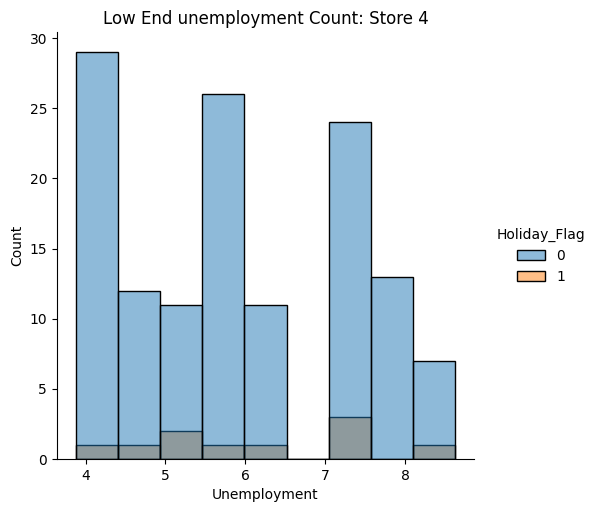

In [61]:
sns.displot(Store4_df, x="Unemployment", hue="Holiday_Flag")
plt.title("Low End unemployment Count: Store 4")
plt.show()

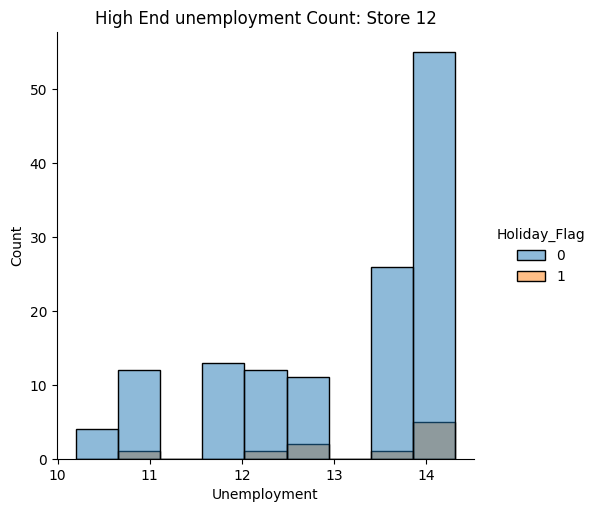

In [60]:
sns.displot(Store12_df, x="Unemployment", hue="Holiday_Flag")
plt.title("High End unemployment Count: Store 12")
plt.show()

We can see that these stores, especially 12, are very consistent in unemployment rate. Additionally, when plotting their rate against Customer Price Index (CPI), we see...

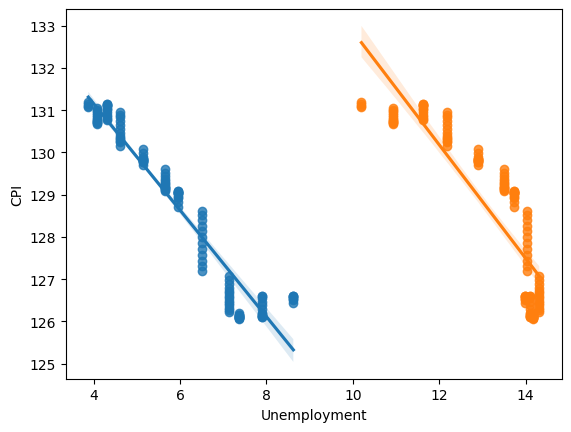

In [57]:
sns.regplot(Store4_df, x="Unemployment", y="CPI")
sns.regplot(Store12_df, x="Unemployment", y="CPI")
plt.show()

We see a noticeable negative correlation between Unemployment and CPI.